<p><font size=6 color="#2E1698"><em><u><center>Data Processing</center></u></em></font></p><br>
<p><font size=3.2 color="#2E1698"><i><u>Introduction:</u></i> explain our data blablabla we are here aiming to manipulate the data that we generated before.</font><p><br>

<font color="#206B50" size = 3><center>**SUMMARY**</center></font><br>
<font size=3.2 color="#2E1698">
<ol>
      <li>Data cleaning</li>
      <li>Provide a list of the 15 most common words</li>
      <li>Provide a list of the 2 pairs of words having the highest co-occurrence frequency</li>
      <li>Build a graphical representation of the most frequent words with their polarity (pos/neg or anger/joy/fear/...)</li>
      <li>Indicate the 3 most frequent representatives words in each category</li>
      <li>Compare the results of the two approaches</li>
    </ol>
</font>

<p><font size=3 color="#206B50"><center><B>PART I: DATA CLEANING</B></center></font></p>
<font size=3 color="#2E1698">First things first, let's import the csv file. We are using french tweets this is why we need to specify the UTF-8 encoding. To have a better idea of our database we decided to show the first 5 lines.</font><br>

In [12]:
tweets = read.csv("data/debat_primaire_20000.csv", encoding="UTF-8")
print(dim(tweets))
head(tweets, n = 5)

[1] 20000    17


X,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE,NA,NA
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE,NA,NA
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",FALSE,0,NA,2017-01-19 22:50:06,FALSE,NA,8.222146e+17,NA,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE,NA,NA
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE,NA,NA
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,FALSE,0,NA,2017-01-19 22:50:05,FALSE,NA,8.222146e+17,NA,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE,NA,NA


<p><font color="#2E1698" size = 3.2>As you can see, our data frame contains <font color="red">17</font> columns and <font color="red">20 000</font> rows, let's see the 10 firsts rows.</font><br></p>
<font color="#2E1698" size = 3.2>Let's see if all the columns have multiple values, or if some are useless.</font>

In [13]:
cat("UNIQUE", "\n")
cat("Favorited: ",head(unique(tweets$favorited)), "\n")
cat("FavoriteCount: ",head(unique(tweets$favoriteCount)), "\n")
cat("ReplyToSN: ",head(unique(tweets$replyToSN)), "\n")
cat("ReplyToUID: ",head(unique(tweets$replyToUID)), "\n")
cat("Id: ",head(unique(tweets$id)), "\n")
cat("IsRetweet: ",head(unique(tweets$isRetweet)), "\n")
cat("Lattitude: ",head(unique(tweets$latitude)), "\n")
cat("Longitude: ",head(unique(tweets$longitude)), "\n\n")

UNIQUE 
Favorited:  FALSE 
FavoriteCount:  0 1 3 2 20 17 
ReplyToSN:  NA 216 36 8 159 32 
ReplyToUID:  NA 8.144061e+17 500852226 87425370 465866698 14389177 
Id:  8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 8.222146e+17 
IsRetweet:  FALSE TRUE 
Lattitude:  NA 46.813 48.88828 48.88826 48.88828 48.89228 
Longitude:  NA 8.4445 2.395666 2.395496 2.39554 2.331879 



In [14]:
cat("Favorited TRUE: ", length(which(tweets$favorited == "TRUE")), "\n")
cat("Favorited FALSE: ", length(which(tweets$favorited == "FALSE")), "\n\n")

Favorited TRUE:  0 
Favorited FALSE:  20000 



<font  
color="#2E1698" size = 3.2>We can see here that there is no TRUE value for favorited, only FALSE. favorited is useless though.</font>

In [15]:
cat("No favoritedCount: ", length(which(tweets$favoriteCount == 0)), "\n")
cat("At least one favoritedCount: ", length(which(tweets$favoriteCount != 0)), "\n")
cat("Percentage of tweets that have favoritedCount",(3919/20000)*100,"%")

No favoritedCount:  16081 
At least one favoritedCount:  3919 
Percentage of tweets that have favoritedCount 19.595 %

<font color="#2E1698" size = 3.2>The favoriteCount have multiple values, 20% of the are not 0 we better keep this column. It is maybe a significative data</font>

In [16]:
cat("Tweets containing longitude information: ", length(which(tweets$longitude != "NA")), "\n")
cat("Tweets containing latitude information: ", length(which(tweets$latitude != "NA")), "\n")
cat("Percentage of tweets containing infos: ", 9/20000*100, "%")

Tweets containing longitude information:  9 
Tweets containing latitude information:  9 
Percentage of tweets containing infos:  0.045 %

<font color="#2E1698" size = 3.2>There is only 9 tweets over 20 000 that contains latitude and longitude, this represents only 0.045% of the tweets, this info can be considered as useless, and we can delete this two columns too.</font>


In [17]:
cat("Tweets with replyToSN not null", length(which(tweets$replyToSN != "NA")),"\n")
cat("Tweets with replyToUID not null", length(which(tweets$replyToUID != 'NA')), "\n")
cat ("Tweets with replyToSID not null", length(which(tweets$replyToSID != 'NA')), "\n")
cat("Percentage of tweets containing replyToSN/UID", 698/20000*100, "%", "\n")
cat("Percentage of tweets containing replyToSID", 445/20000*100, "%")

Tweets with replyToSN not null 698 
Tweets with replyToUID not null 698 
Tweets with replyToSID not null 445 
Percentage of tweets containing replyToSN/UID 3.49 % 
Percentage of tweets containing replyToSID 2.225 %

<font color="#2E1698" size = 3.2>There is only about 3.5% of the replytoSN and replyToUID data that are not NA, we can delete these two columns as they don't seem to be interesting to study. Same thing for the replyToSID, with less than 2.5%. <br><br>
Let's delete these useless columns!</font>

In [18]:
tweets <- subset(tweets, select=-c(replyToSN,replyToUID, replyToSID, latitude, longitude, favorited))

In [19]:
head(tweets, n=10)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,Ce fut un débat intéressnt ! Ccl :Il y'a encore de l'espoir!N'oublions pas qu'un bon président est un président engagé ! #PrimaireLeDebat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,C'est bon @GoogleFR @TwitterFrance avez vous bien collectés mes données ? Bonne nuit #numerique #bigdata #PrimaireLeDébat,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,"RT @DeLuca_Patrice: .@manuelvalls ""Je veux incarner l'espérance, venez voter dimanche!"" #AvecValls #PrimaireLeDebat",0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,"RT @DeLuca_Patrice: .@manuelvalls ""Nous avons besoin d'une Europe forte et unie"" #AvecValls #PrimaireLeDebat #Valls2017",0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,RT @LPF_Paris18: #PrimaireLeDebat Dis donc @manuelvalls c'est à coup de #decheancedenationalite et de #49Al3 que tu penses nous sauver? #Mo…,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,"""J'ai un progrès précis, crédible, de gauche"", a dit @Vincent_Peillon dans sa conclusion https://t.co/Zs9UHNLcNb… https://t.co/mBtiNvJIAb",0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE
7,RT @benoithamon: #PrimaireLeDebat Paix au Proche-orient : nous devons écouter les sociétés et prendre des initiatives -&gt; reconnaissance de…,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE
8,RT @SylviaPinel: Les contours de son programme restent flous d'ailleurs #PrimaireLeDebat,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE
9,"RT @AnneYunie59000: #PrimaireLeDebat Après les 7 plaies d'Egypte ,les Français ont le droit ce soir aux 7 plaies de la France .",0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE
10,Voilà pourquoi voter pour #Montebourg dimanche ! #Montebourg2017 #PrimaireLeDebat https://t.co/2dk2xOSLvA,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE


<font color="#2E1698" size = 3.2>If we want to use the text, it have to be cleaned first</font>


In [20]:
clean_text = function(x)
{
    #To convert the text in lowercase
    try.error = function(z)
    {
        y = NA
        try_error = tryCatch(tolower(z), error=function(e) e)
            if (!inherits(try_error, "error"))
                y = tolower(z)
                return(y)
    }
            
    x = sapply(x, try.error)
    
    #Keep lepen > 3 letters
    x = gsub("le pen", "lepen", x)
    x = gsub("#primaire\\w+ *", "", x)
            
     #remove all links starting by http
    x = gsub('http\\S+\\s*', '', x)
            
    # replace apostrophes
    x = gsub("'", " ", x)

    # remove punctuation except @, #, _, -
    x = gsub("@", "AAAAAAAAAAA", x)
    x = gsub("#", "BBBBBBBBBBB", x)
    x = gsub("_", "CCCCCCCCCCC", x)
    x = gsub("-", "DDDDDDDDDDD", x)
    x = gsub("[[:punct:]]", " ", x)
    x = gsub("AAAAAAAAAAA", "@", x)
    x = gsub("BBBBBBBBBBB", "#", x)
    x = gsub("CCCCCCCCCCC", "_", x)
    x = gsub("DDDDDDDDDDD", "-", x)
            
    # correcting the spaces after the conserved @
    x = gsub("@ ", "@", x)
            
    # correcting the spaces after the conserved _
    x = gsub("_ ", "_", x)
            
    # correcting the spaces after the conserved -
    x = gsub("- ", "-", x)
    
    # remove numbers/Digits
    x = gsub("[[:digit:]]", "", x)
    
    # remove tabs
    x = gsub("[ |\t]{2,}", " ", x)
            
    # remove blank spaces at the beginning/end
    x = gsub("^ ", "", x)  
    x = gsub(" $", "", x)
    
    
    # As we have already a column indicating if the tweet is a retweet or not 
    # we can remove "RT @xxx" in the tweet header
    x = gsub("rt @\\w+ *", "", x)
    x = gsub('\\b\\w{1,3}\\s','', x)
            
    # remove double spaces
    x = gsub("  ", " ", x)
    x = gsub("  ", " ", x)
    return(x)
}
                             
tweets$text <- clean_text(tweets$text)
head(tweets, n = 20)

X,text,favoriteCount,created,truncated,id,statusSource,screenName,retweetCount,isRetweet,retweeted
1,débat intéressnt encore espoir oublions président président engagé,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",OuAtas,0,FALSE,FALSE
2,@googlefr @twitterfrance avez vous bien collectés données bonne nuit #numerique #bigdata,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",WajdiHA2,0,FALSE,FALSE
3,@manuelvalls veux incarner espérance venez voter dimanche #avecvalls,0,2017-01-19 22:50:06,FALSE,8.222146e+17,"<a href=""http://www.twitter.com"" rel=""nofollow"">Twitter for Windows</a>",ProvenceValls,5,TRUE,FALSE
4,@manuelvalls nous avons besoin europe forte unie #avecvalls #valls,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Jojo29_BZH,10,TRUE,FALSE
5,donc @manuelvalls coup #decheancedenationalite #penses nous sauver #mo,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",FranceCredible,6,TRUE,FALSE
6,progrès précis crédible gauche @vincent_peillon dans conclusion,0,2017-01-19 22:50:05,TRUE,8.222146e+17,"<a href=""http://snappytv.com"" rel=""nofollow"">SnappyTV.com</a>",Europe1,0,FALSE,FALSE
7,paix proche-orient nous devons écouter sociétés prendre initiatives -reconnaissance de,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delpeyrat,225,TRUE,FALSE
8,contours programme restent flous ailleurs,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",NouetDom,5,TRUE,FALSE
9,après plaies egypte français droit soir plaies france,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Mobile Web (M5)</a>",delhoume7,20,TRUE,FALSE
10,voilà pourquoi voter pour #montebourg dimanche #montebourg,0,2017-01-19 22:50:05,FALSE,8.222146e+17,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",antoinehb,0,FALSE,FALSE


<font color="#2E1698" size = 3.2>Let's see which are the most used @xxx and replace them with words. Afterward we will delete all the @xxx that will not be replaced</font>


In [21]:
col = tweets$text
at.pattern = "@\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
top40_user_called = sort(table(unlist(mfw)), decreasing=TRUE)
head(top40_user_called, n = 40)


    @benoithamon      @montebourg     @manuelvalls @vincent_peillon 
             985              815              611              511 
        @fderugy  @emmanuelmacron        @francetv     @sylviapinel 
             370              299              296              233 
 @leprojetfrance    @jlbennahmias    @jeunesavecam       @leasalame 
             151              129               68               66 
      @yanngalut @realdonaldtrump         @najatvb          @europe 
              64               61               48               40 
 @francecredible       @fhollande    @davidpujadas             @vp_ 
              40               38               35               30 
       @montebou       @chtaubira    @mathieusapin     @guillaumetc 
              29               28               28               24 
   @martineaubry         @compile     @jlmelenchon      @franceinfo 
              21               18               18               17 
          @bfmtv    @fabiennamias

In [22]:
clean_name_text = function(x)
{
  x = gsub('\\S+hamo\\S+', 'hamon', x)
  x = gsub('\\S+ontebou\\S+', 'montebourg', x)
  x = gsub('\\S+vall\\S+', 'valls', x)
  x = gsub('\\S+peillon\\S+', 'peillon', x)
  x = gsub('\\S+rugy\\S+', 'derugy', x)
  x = gsub('\\S+macro\\S+', 'macron', x)
  x = gsub('\\S+francet\\S+', 'francetv', x)
  x = gsub('\\S+pinel\\S+', 'pinel', x)
  x = gsub('\\S+nnahmia\\S+', 'bennahmias', x)
  x = gsub('\\S+eunesavecam\\S+', 'montebourg', x) #jeunes avec Arnaud Montebourg
  x = gsub('\\S+galut\\S+', 'galut', x) 
  x = gsub('\\S+donald\\S+', 'trump', x)
  x = gsub('\\S+trump\\S+', 'trump', x)
  x = gsub('\\S+najat\\S+', 'najatvb', x)
  x = gsub('\\S+vallaud\\S+', 'najatvb', x)
  x = gsub('\\S+elkacem\\S+', 'najatvb', x)
  x = gsub('\\S+europe\\S+', 'europe', x)
  x = gsub('\\S+olland\\S+', 'hollande', x)
  x = gsub('\\S+ujada\\S+', 'pujadas', x)
  x = gsub('\\S+ujada\\S+', 'pujadas', x)
  x = gsub('\\S+taubir\\S+', 'taubira', x)
  x = gsub('\\S+sapin\\S+', 'sapin', x)
  x = gsub('\\S+guillaumetc\\S+', 'taubira', x)
  x = gsub('\\S+aubry\\S+', 'aubry', x)
  x = gsub('\\S+compile\\S+', 'compile', x)
  x = gsub('\\S+melenchon\\S+', 'melenchon', x)
  x = gsub('\\S+francei\\S+', 'franceinfo', x)
  x = gsub('\\S+bfm\\S+', 'bfmtv', x)
  x = gsub('\\S+namia\\S+', 'namias', x)
  x = gsub('\\S+vp_\\S+', 'peillon', x)
  x = gsub('\\S+fillon\\S+', 'fillon', x)
  x = gsub('\\S+avecmv\\S+', 'valls', x) #Avec Manuel Valls
  x = gsub('\\S+mlp\\S+', 'lepen', x)

  x = gsub("#\\w+ *", "", x)
  x = gsub("@\\w+ *", "", x)
}

tweets$text <- clean_name_text(tweets$text)

<p><font size=3 color="#206B50"><center><B>PART II: LIST OF 15 MOST COMMON WORD</B></center></font></p>
<font color="#2E1698" size = 3.2>Let's see which are the most used words</font>

In [23]:
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern,
                        text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
mfw = gsub(" ", "", mfw)
w = sort(table(unlist(mfw)), decreasing=TRUE)

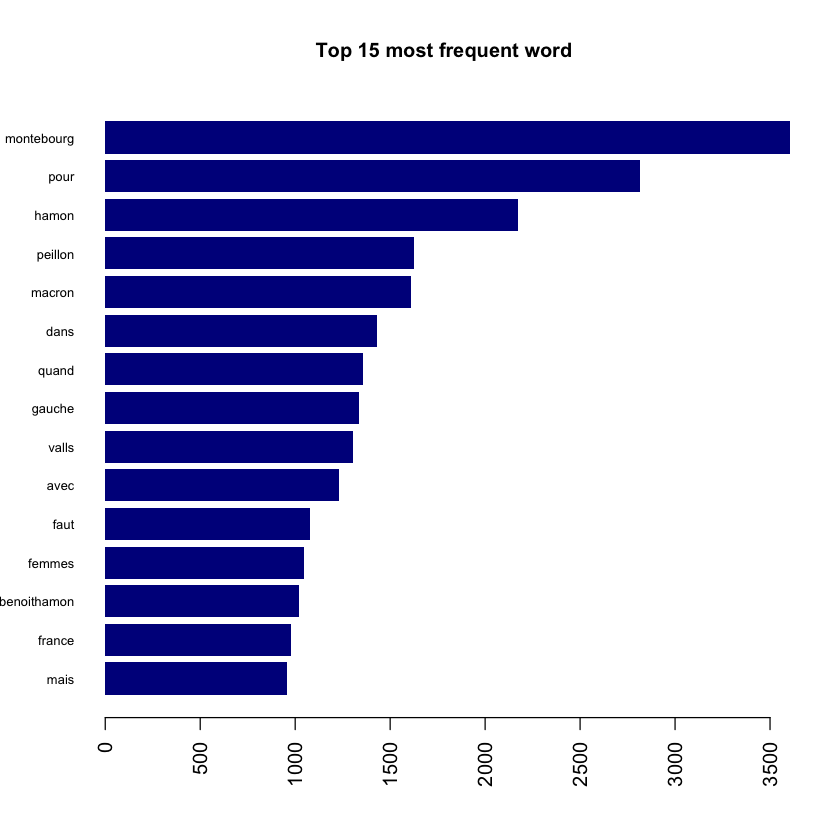

In [24]:
top15 = head(w, n = 15)
top15d = sort(top15, decreasing=FALSE) 
# barplot
#mar.default <- c(15,10,5,0) + 0.1
#par(mar = mar.default + c(0, 0, 0, 0))
barplot(top15d, border=NA, las=2, main="Top 15 most frequent word", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.65)

<font color="#2E1698" size = 3.2>We can see in the display of the 15 most frequent word that some of them are not revelant like the preposition 'dans' so we want to clean our text again</font>

In [25]:
clean_unused_text = function(x){
    
    x = gsub("dans ", "", x)
    x = gsub("pour ", "", x)
    x = gsub("quand ", "", x)
    x = gsub("avec ", "", x)
    x = gsub("mais ", "", x)
    x = gsub("tre ", "", x)
    x = gsub("vous ", "", x)
    x = gsub("nous ", "", x)
    x = gsub("comme ", "", x)
    x = gsub("plus ", "", x)
    x = gsub("tout ", "", x)
    x = gsub("sont ", "", x)
}


tweets$text <- clean_unused_text(tweets$text)

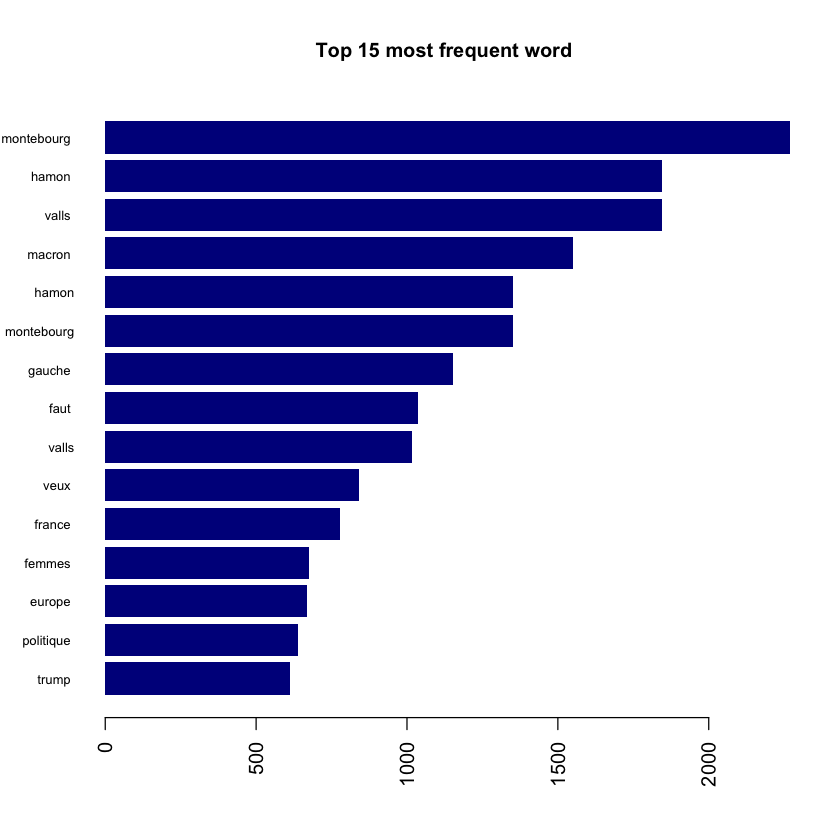

In [26]:
col = tweets$text
at.pattern = "[a-zA-Z]\\w+ *"
have.at = grep(x = col, pattern = at.pattern)
at.matches = gregexpr(pattern = at.pattern, text = col[have.at])
extracted.at = regmatches(x = col[have.at], m = at.matches)

# most frequent words
mfw = sort(unlist(extracted.at), decreasing=TRUE)
w = sort(table(unlist(mfw)), decreasing=TRUE)
#head(d, n = 20)

top15 = head(w, n = 15)
top15d = sort(top15, decreasing=FALSE) 
barplot(top15d, border=NA, las=2, main="Top 15 most frequent word", cex.main=1, horiz=TRUE, col= "darkblue", cex.names=0.65)


The downloaded binary packages are in
	/var/folders/44/5tn16mqx3d795yby13nmp22r0000gn/T//RtmpkAZVeg/downloaded_packages


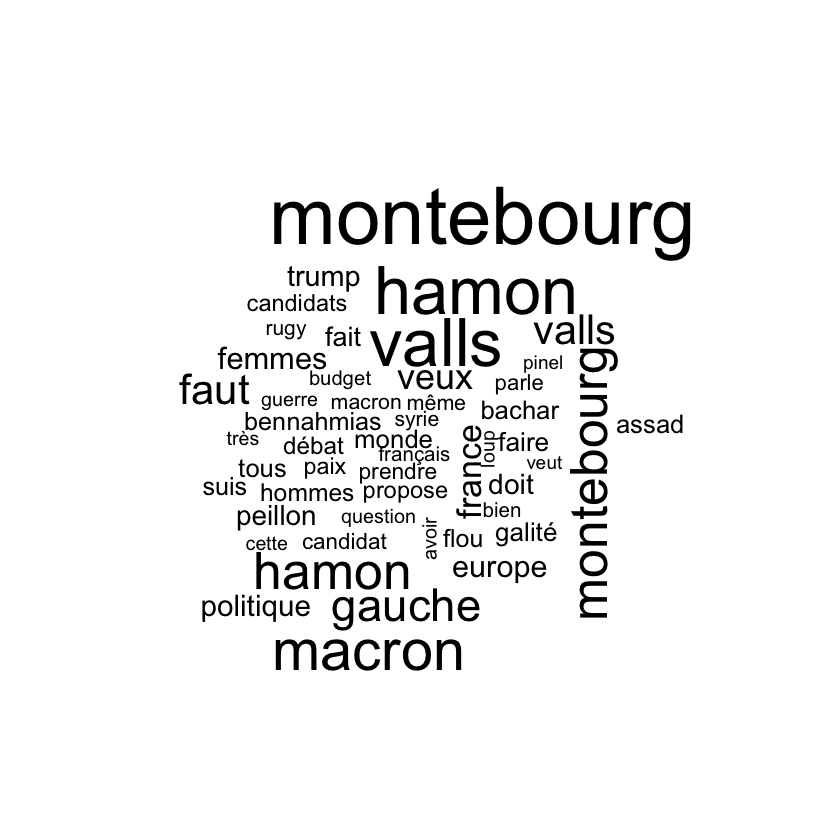

In [30]:
install.packages("wordcloud")
library(tm) # need R 3.3.2
library(SnowballC)
library(wordcloud)

numberWord = 50
topWord = head(w, n = numberWord)
topWord = sort(topWord, decreasing=FALSE) 
wordcloud(names(topWord), topWord, min.freq=2)


     trump   politique      europe      femmes      france        veux  
        613         639         667         675         779         842 
      valls       faut      gauche   montebourg       hamon     macron  
       1016        1035        1154        1351        1352        1549 
     valls       hamon  montebourg  
       1844        1845        2268 